<a href="https://colab.research.google.com/github/luxorishere/Applied-Data-Science-with-Python-Specialization/blob/main/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
backup = df.copy()

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:

df["Age"].fillna(df["Age"].mean(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df["Age"].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [ ]:

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
IQR = q3 - q1

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

df = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  825 non-null    int64  
 1   Survived     825 non-null    int64  
 2   Pclass       825 non-null    int64  
 3   Name         825 non-null    object 
 4   Sex          825 non-null    object 
 5   Age          825 non-null    float64
 6   SibSp        825 non-null    int64  
 7   Parch        825 non-null    int64  
 8   Ticket       825 non-null    object 
 9   Fare         825 non-null    float64
 10  Cabin        176 non-null    object 
 11  Embarked     824 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.8+ KB


In [ ]:
df["Age"].unique()


array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        , 27.        , 14.        ,  4.        , 20.        ,
       39.        , 31.        , 34.        , 15.        , 28.        ,
        8.        , 19.        , 40.        , 42.        , 21.        ,
       18.        ,  3.        ,  7.        , 49.        , 29.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        , 30.        , 33.        ,
       23.        , 24.        , 46.        , 37.        , 47.        ,
       14.5       , 32.5       , 12.        ,  9.        , 36.5       ,
       51.        , 40.5       , 44.        , 50.        , 36.        ,
       45.5       , 20.5       , 41.        , 52.        , 23.5       ,
       43.        , 10.        , 13.        , 48.        , 53.        ,
       24.5       ,  6.        , 30.5       , 34.5       ])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
backup = df.copy()

In [ ]:
df["Parch"].unique()

array([0, 2, 1, 5, 3, 4, 6])

In [ ]:

df.drop(columns=["Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


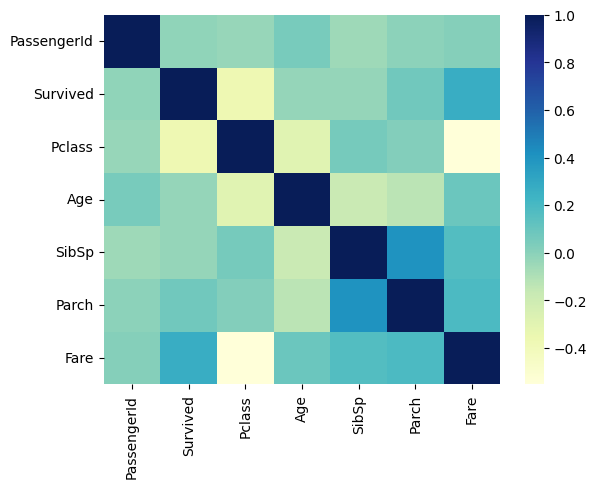

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), cmap = "YlGnBu")
plt.show()

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.018151,-0.034032,0.048444,-0.053075,-0.006142,0.015231
Survived,-0.018151,1.000000,-0.367774,-0.027320,-0.030860,0.074199,0.269672
Pclass,-0.034032,-0.367774,1.000000,-0.286128,0.057760,0.018742,-0.552684
Age,0.048444,-0.027320,-0.286128,1.000000,-0.182124,-0.131052,0.091278
SibSp,-0.053075,-0.030860,0.057760,-0.182124,1.000000,0.408487,0.166625
Parch,-0.006142,0.074199,0.018742,-0.131052,0.408487,1.000000,0.190001
Fare,0.015231,0.269672,-0.552684,0.091278,0.166625,0.190001,1.000000


In [ ]:
df_suvived = df["Survived"]

In [ ]:
data_with_numeric_values = df.copy()

In [ ]:
df = backup.copy()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
df = df.reset_index(drop = True)
# Create a StratifiedShuffleSplit object
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

# Split the data into train and test sets
for train_indices, test_indices in split.split(df, df[["Survived", "Pclass", "Sex"]]):
  strat_train_set = df.loc[train_indices]
  strat_test_set = df.loc[test_indices]

In [ ]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
25,30,0,3,"Todoroff, Mr. Lalio",male,29.699118,0,0,349216,7.8958,NaN,S
55,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,B28,NaN
437,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.000000,1,2,C.A. 34651,27.7500,NaN,S
229,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.000000,1,0,244252,26.0000,NaN,S
637,692,1,3,"Karun, Miss. Manca",female,4.000000,0,1,349256,13.4167,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
634,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.000000,0,0,350036,7.7958,NaN,S
663,719,0,3,"McEvoy, Mr. Michael",male,29.699118,0,0,36568,15.5000,NaN,Q
394,426,0,3,"Wiseman, Mr. Phillippe",male,29.699118,0,0,A/4. 34244,7.2500,NaN,S


In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0000,NaN,S
487,528,0,1,"Farthing, Mr. John",male,29.699118,0,0,PC 17483,221.7792,C95,S
111,123,0,2,"Nasser, Mr. Nicholas",male,32.500000,1,0,237736,30.0708,NaN,C
69,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
751,812,0,3,"Lester, Mr. James",male,39.000000,0,0,A/4 48871,24.1500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
182,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.000000,0,0,345770,9.5000,NaN,S
457,498,0,3,"Shellard, Mr. Frederick William",male,29.699118,0,0,C.A. 6212,15.1000,NaN,S
471,512,0,3,"Webber, Mr. James",male,29.699118,0,0,SOTON/OQ 3101316,8.0500,NaN,S
647,703,0,3,"Barbara, Miss. Saiide",female,18.000000,0,1,2691,14.4542,NaN,C


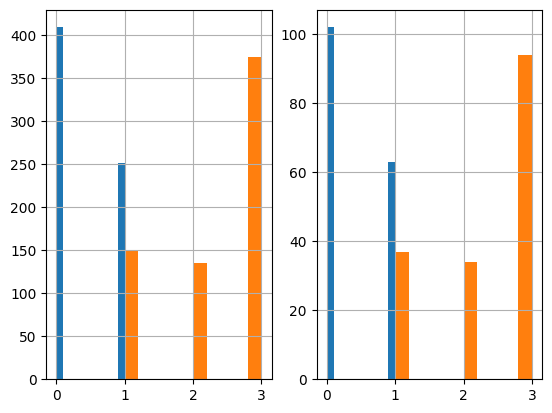

In [ ]:
plt.subplot(1, 2, 1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
  def fit(self, X, y = None):
    return self
  def transform(self, X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[["Embarked"]]).toarray()

    column_names = ["C", "S", "Q", "N"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[["Sex"]]).toarray()
    column_names = ["Female", "Male"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]
    return X


In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y = None):
    return self
  def transform(self, X):
    return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis = 1, errors = "ignore")

In [ ]:
from sklearn